In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor 
from scipy.spatial.distance import cdist
import json

In [137]:
data = pd.read_csv("best_places_copy.csv",sep=";",index_col=0)

In [138]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [139]:
data.reset_index(drop=True,inplace=True)

In [140]:
rates = np.random.ranf(40124) + np.random.randint(0,5,size=40124)+0.000001

In [141]:
rates

array([2.51447167, 2.47957186, 0.68664876, ..., 3.34170397, 4.50897316,
       0.42488109])

In [142]:
rates_final = np.round(rates,1)

In [143]:
rates_final

array([2.5, 2.5, 0.7, ..., 3.3, 4.5, 0.4])

In [144]:
data["rates"] = rates_final
data

,Places,Addres,lng,ltd,rates
0,Александринский театр,"Александринский театр, 6, площадь Островского,...",30.336182,59.931796,2.5
1,Александро-Невская лавра,"Свято-Троицкая Александро-Невская Лавра, просп...",30.387581,59.921123,2.5
2,Александровская колонна,"Александровская колонна, Дворцовая площадь, Дв...",30.315816,59.939043,0.7
3,Аничков мост,"Аничков мост, Апраксин двор, округ № 78, Санкт...",30.342877,59.933248,0.2
4,Антониево-Дымский монастырь,"Антониево-Дымский монастырь, А-114, Бурково, Б...",33.681941,59.574368,3.3
...,...,...,...,...,...
40119,Северный служебный флигель,"г. Москва, ул. Тимирязевская, д. 54",55.832545,37.550298,0.2
40120,Ферма,"г. Москва, ул. Тимирязевская, д. 48",55.832545,37.550298,1.7
40121,Парк с прудами,"г. Москва, Тимирязевская ул., вл. 49, 52, 58, ...",55.832545,37.550298,3.3
40122,Южный служебный флигель,"г. Москва, ул. Тимирязевская, д. 52 (часть)",55.832545,37.550298,4.5


In [4]:
fl = open("../query.txt")
dt = json.loads(fl.read())
query= np.array(dt)

In [147]:
query.shape

(502, 2)

In [5]:
rec_distance = 0.02

data= np.array(query)
data_LandMark = pd.read_csv("best_places.csv",sep=";",index_col=0)
#points = np.array(points)
#Чтение датасета мест
np_landmark = data_LandMark[["ltd","lng"]].to_numpy()



data_dist = cdist(data,np_landmark,metric="euclidean")

norm=[]
for i in np.unique(np.where(data_dist<rec_distance)[1]):    
    norm.append(np.min(data_dist[:,i]))

# sliced_data = data_LandMark.iloc[np.unique(np.where(data_dist<rec_distance)[1])]
# sliced_data["dist"] = norm
sliced_data = data_LandMark
sliced_data["dist"] = np.min(data_dist,axis=0)

(array([  2.,   0.,   1.,   0.,   0.,   0.,   2.,   3.,  31., 165.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

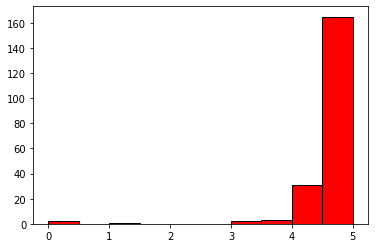

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib histogram
#plt.hist(sliced_data["dist"], color = 'blue', edgecolor = 'black')
plt.hist(sliced_data["rates"], color = 'red', edgecolor = 'black')

(array([3655., 4007., 4090., 3978., 3987., 3974., 3985., 4008., 3913.,
        4413.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

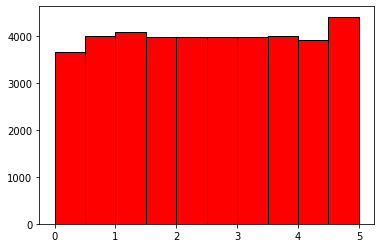

In [362]:
plt.hist(data_LandMark_last["rates"], color = 'red', edgecolor = 'black')

(array([3634., 3993., 4074., 3965., 3980., 3955., 3974., 3995., 3907.,
        4473.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

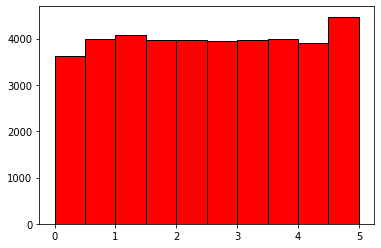

In [4]:
data_LandMark = pd.read_csv("best_places_2.csv",sep=";",index_col=0)
#plt.hist(data_LandMark_last["rates"], color = 'blue', edgecolor = 'black')
plt.hist(data_LandMark["rates"], color = 'red', edgecolor = 'black')

In [380]:
regressor = CatBoostRegressor(iterations=1000)

In [381]:
target = sliced_data["rates"]/sliced_data["dist"]  

In [382]:
from sklearn.model_selection import train_test_split

In [395]:
X_train,X_test,y_train, y_tets = train_test_split(sliced_data[["rates","dist"]],target,shuffle=True)

In [396]:
regressor.fit(X_train,y_train,verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [397]:
from sklearn.metrics import mean_squared_error

In [398]:
regressor.best_score_

{'learn': {'RMSE': 0.992638090552624}}

In [399]:
mean_squared_error(y_tets,regressor.predict(X_test))

400.53549465478693

In [339]:
regressor.save_model("model")